# Filter anwenden

```{admonition} Lernziele
:class: hint
* Sie können Scikit-Image benutzen, um Kanten und Objekte in einem Foto zu detektieren.
```


## Kanten detektieren mit canny

Die Funktion `canny()` ermittelt in einem Graustufenbild die Kanten. Wir laden
zuerst das Foto neu und wandeln es direkt in ein Graustufenbild um. Dann
probieren wir den Canny-Filter aus. Dazu importieren wir zunächst die
`canny()`-Funktion aus dem Untermodul `skimage.feature`.

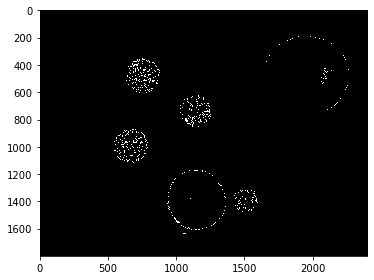

In [44]:
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.io import imread, imshow       

foto = imread("muenzen_und_mehr_medium.jpg")
foto_grau = rgb2gray(foto)

kanten = canny(foto_grau, sigma=2)
imshow(kanten)

## Hough-Transformation

Die Hough-Transformation detektiert in einem Graustufenbild Gerade, Kreise oder
andere geometrische Objekte. Allerdings müssen wir zuvor eine Kantenerkennung
durchgeführt haben, also den Canny-Filter angewendet haben. Wir suchen in
unserem Beispielfoto nach Kreisen. Dafür stellt Scikit-Image die Funktion
`hough_circle()` im Untermodul `skimage.transform` zur Verfügung. Mehr Details
finden Sie in der [Dokumentation/Scikit-Image →
hough_circle()](https://scikit-image.org/docs/stable/api/skimage.transform.html?highlight=hough#skimage.transform.hough_circle).

Es wäre jetzt schön, einfach das Kantenbild als Argument der
`hough_circle()`-Funktion verwenden zu können und den Rest der Bildanalyse
Scikit-Image zu überlassen. Leider benötigen wir ein zweites Argument, nämlich
den Radius, nach dem gesucht werden soll. Wir probieren es einfach mal mit einem
Radius von 120 px.

In [48]:
from skimage.transform import hough_circle

kreise = hough_circle(kanten, 120)


Um anschließend die detektierten Kreise auch sichtbar machen zu können,
benötigen wir eine weitere Funktion aus dem Untermodul `skimage.transform`.

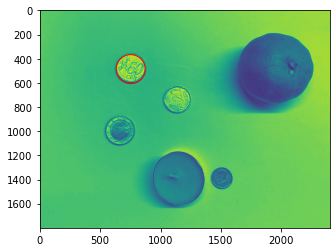

In [49]:
import matplotlib.pylab as plt
import matplotlib.patches as patches
from skimage.transform import hough_circle_peaks

_, x, y, r = hough_circle_peaks(kreise, [120,])

fig, ax = plt.subplots()
ax.imshow(foto_grau)
kreislinie = patches.Circle( (x[0],y[0]), r[0], edgecolor='r', facecolor='none')
ax.add_patch(kreislinie)


Tatsächlich, es wurde ein Kreis detektiert. Um auch die anderen zu finden,
erzeugen wir jetzt ein Array von möglichen Radien und lassen in einer
for-Schleife die möglichen Kreise bestimmen.

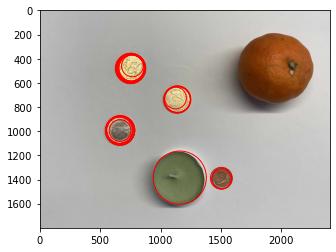

In [56]:
import numpy as np

radius_liste = np.arange(50, 250, 10)
kreise = hough_circle(kanten, radius_liste)
_, x_liste, y_liste, r_liste = hough_circle_peaks(kreise, radius_liste, total_num_peaks=25)

fig, ax = plt.subplots()
ax.imshow(foto)
for (x,y,r) in zip(x_liste, y_liste, r_liste):
    kreislinie = patches.Circle( (x,y), r, edgecolor='r', facecolor='none')
    ax.add_patch(kreislinie)


Die Mandarine wird nicht erkannt, aber Münzen und Teelicht werden als
kreisförmige Objekte detektiert.

## Zusammenfassung und Ausblick

Bei der Detektion von Objekten in Bildern ist die Umwandlung in ein
Graustufenbild der erste Schritt. Danach werden je nach Anwendungsszenario
verschiedene Filter angewendet. Um beispielsweise kreisförmige Objekte im Bild
wiederzufinden, verwenden wir erst den Canny-Filter und dann die
Hough-Transformation für Kreise. Für Linien wäre beispielsweise die
Hough-Transformation Straight Lines das Mittel der Wahl.